<a href="https://colab.research.google.com/github/eduardoscovino/Pokemon-analysis/blob/main/Pokemon_Analysis_With_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install ipywidgets -q
!pip install bar_chart_race -q

In [47]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import bar_chart_race as bcr
from ipywidgets import interact, fixed, interact_manual
import ipywidgets as widgets

In [2]:
df = pd.read_csv('drive/MyDrive/Kaggle/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## The variables of the dataset

* `Name:` Name of the pokemon
* `Type 1:` Each pokemon has a type. Ex: Grass, water, fire...
* `Type 2:` A pokemon can also have more than one type
* `Total:` The whole power of the pokemon, which is the sum of its attibutes (the following columns)
* `HP:` Hit points (or health), which is the impact a pokemon can handle before being out of combat
* `Attack:` Power of normal attacks
* `Defense:` Power of resistence against normal attacks
* `Sp. Atk:` Power of the special attack
* `Sp. Def:` Power of resistence against special attacks
* `Speed:` The criteria to define which pokemon attacks first each round
* `Generation:` From which generation is the pokemon
* `Legendary:` A boolean variable to inform if the pokemon is legendary or not

## Data Cleaning

Actually, I rather prefer working with columns written uppercased. So, let's do this now.

In [3]:
df.columns = df.columns.str.upper()
df.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.loc[df.NAME.str.contains('Mega')].head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False


If we look at the pokemons whose name contains 'Mega', we see that the strings before the 'Mega' are unnecessary.

So let's cut the strings before the 'Mega' in our dataset.

In [5]:
df.NAME = df.NAME.str.replace(".*(?=Mega)", "")
df.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Treatment for null values

In [6]:
print(df.isnull().sum().sort_values(ascending=False) / df.shape[0])

TYPE 2        0.4825
#             0.0000
NAME          0.0000
TYPE 1        0.0000
TOTAL         0.0000
HP            0.0000
ATTACK        0.0000
DEFENSE       0.0000
SP. ATK       0.0000
SP. DEF       0.0000
SPEED         0.0000
GENERATION    0.0000
LEGENDARY     0.0000
dtype: float64


It seems only the `TYPE 2` has null values, which makes sense. These are the pokemons that don't have a dual type. In this case, let's replace the null values with "Type 1".

In [7]:
df['TYPE 2'].fillna('Type 1', inplace=True)
df.loc[df['TYPE 2'] == 'Type 1'].head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
4,4,Charmander,Fire,Type 1,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Type 1,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,Type 1,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,Type 1,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,Type 1,530,79,83,100,85,105,78,1,False


## First impressions of the dataset

In [8]:
print('{} rows'.format(df.shape[0]))
print('{} pokemons'.format(df.NAME.unique().size))

800 rows
800 pokemons


As we've got 1 pokemon per row, it's a good idea to put the column `NAME` as the index of the dataframe. Even more, the column `#` doens't make much sense to the analysis. Let's drop it.

In [9]:
df.set_index('NAME', inplace=True)
df.head()

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,Type 1,309,39,52,43,60,50,65,1,False


In [10]:
df=df.drop(['#'],axis=1) # we don't need this column anymore

In the following code, there's the statistical summary, just to see what's going on with the famous metrics, such as mean, quartiles, max and min.

In [11]:
df_summary = df.describe() # basic statistic informations
df_summary

,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Visualizations

### Histograms

Let's see how is the distribution of the attibutes using the histogram.

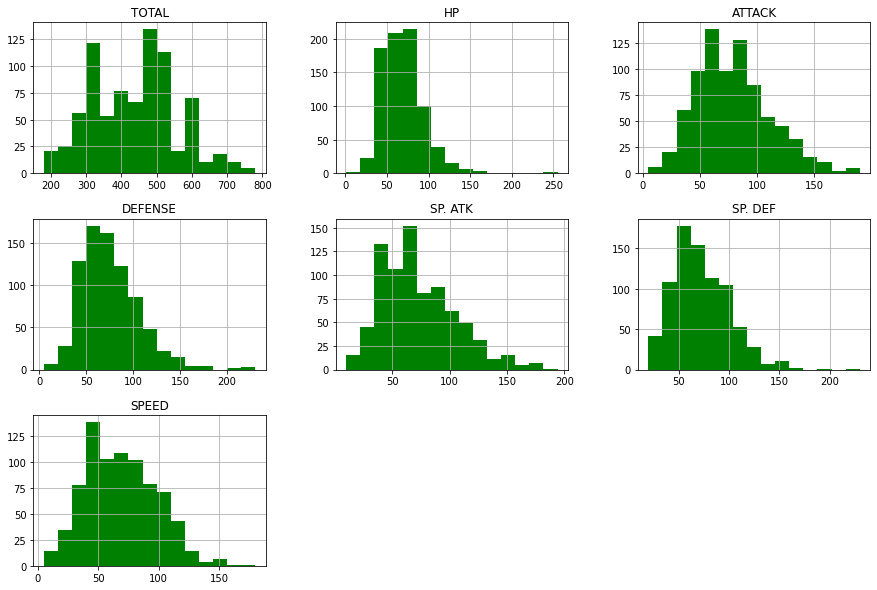

In [12]:
df[[
  'TOTAL',
  'HP',
  'ATTACK',
  'DEFENSE',
  'SP. ATK',
  'SP. DEF',
  'SPEED'
]].hist(bins = 15, figsize =(15, 10), color='green');

### Evolution of types across the generations

With a bar chart race as the alternative used here, we can see in an interative way how the number of pokemons by type changed across the generations.

     |████████████████████████████████| 156 kB 5.2 MB/s 


In [14]:
# the dataset will be the count of pokemons grouped by type and generation
df_bar_race = pd.DataFrame(
    df.groupby(['GENERATION', 'TYPE 1'])['TYPE 1'].count()
)
df_bar_race.columns.values[0] = "AMOUNT" # renaming the column for the count
df_bar_race.reset_index(inplace=True)
df_bar_race.columns.values[1] = "TYPE"

list_gen = df_bar_race.GENERATION.unique() # list for the loop

df_brc = pd.DataFrame()

for gen in list_gen:
  aux_brc = df_bar_race.loc[df_bar_race.GENERATION == gen]
  aux_brc.set_index('GENERATION', inplace=True)
  aux_brc = aux_brc.T # transposing the dataframe
  aux_brc.columns = aux_brc.loc['TYPE', :]
  aux_brc['GENERATION'] = gen
  df_brc = df_brc.append(aux_brc)

# filtering the dataframe to get only the rows with the amounts
df_brc = df_brc.loc[df_brc.index == 'AMOUNT']
df_brc.set_index('GENERATION', inplace=True)
df_brc.fillna(0, inplace=True)

bcr.bar_chart_race(df=df_brc,
                   period_length=2000,
                   filename=None)

### Building an iteractive graphic

The idea here is to compare top 50 of two different types of pokemon to try to predict what would happen in a battle.

In this case, I plotted a x,y with Attack and Defense, and to differentiate the two types, the first type of the input is the red star and the second one is the blue ball.

There's a dropdown below for the user input the desired pokemon type.

In [49]:
def f(type1, type2):
  df1 = df[(df['TYPE 1'] == type1)]
  df2 = df[(df['TYPE 1'] == type2)]
  plt.scatter(df1.ATTACK.head(50), df1.DEFENSE.head(50), color = 'R', label = type1, marker = "*", s = 50)
  plt.scatter(df2.ATTACK.head(50), df2.DEFENSE.head(50), color = 'B', label = type2, s = 25)
  plt.xlabel("ATTACK")
  plt.ylabel("DEFENCE")
  plt.legend()
  plt.plot()
  fig=plt.gcf()
  fig.set_size_inches(12,6) #set the size for the figure
  plt.show()

interact(f, type1 = df['TYPE 1'].unique(), type2 = df['TYPE 1'].unique());

interactive(children=(Dropdown(description='type1', options=('Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poiso…